In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# параметры распределений
mu0, mu01, sigma0 = -2., 0.5 , 1.
mu1, mu11, sigma1 = 3., 1.5,  2.

In [4]:
def sample(d0, d1, n=32):
    x0 = d0.rsample((n,))
    #print ("x0 = ", x0)
    x1 = d1.rsample((n,))
    y0 = torch.zeros((n, 1))
    y1 = torch.ones((n, 1))
    return torch.cat([x0, x1], 0), torch.cat([y0, y1], 0)

In [5]:
#d0 = torch.distributions.Normal(torch.tensor([mu0]), torch.tensor([sigma0]))
#d1 = torch.distributions.Normal(torch.tensor([mu1]), torch.tensor([sigma1]))
d0 = torch.distributions.Normal(torch.tensor([mu0, mu01]), torch.tensor([sigma0]))
d1 = torch.distributions.Normal(torch.tensor([mu1, mu11]), torch.tensor([sigma1]))

In [6]:
layer = nn.Linear(2, 1)
#layer = nn.Linear(1, 1)
print([p.data[0] for p in layer.parameters()])
layer_opt = optim.SGD(lr=1e-3, params=list(layer.parameters()))

[tensor([ 0.4721, -0.3147]), tensor(0.7050)]


In [7]:
log_freq = 500
for i in range(10000):
    if i%log_freq == 0:
        with torch.no_grad():
            x, y = sample(d0, d1, 100000)
            out = torch.sigmoid(layer(x))
            loss = F.binary_cross_entropy(out, y)
        print('Ошибка после %d итераций: %f' %(i/log_freq, loss))
    layer_opt.zero_grad()
    x, y = sample(d0, d1, 1024)
    out = torch.sigmoid(layer(x))
    loss = F.binary_cross_entropy(out, y)
    loss.backward()
    layer_opt.step()

Ошибка после 0 итераций: 0.408096
Ошибка после 1 итераций: 0.302796
Ошибка после 2 итераций: 0.253361
Ошибка после 3 итераций: 0.223946
Ошибка после 4 итераций: 0.203666
Ошибка после 5 итераций: 0.191475
Ошибка после 6 итераций: 0.180407
Ошибка после 7 итераций: 0.172525
Ошибка после 8 итераций: 0.166052
Ошибка после 9 итераций: 0.161729
Ошибка после 10 итераций: 0.156174
Ошибка после 11 итераций: 0.153118
Ошибка после 12 итераций: 0.150063
Ошибка после 13 итераций: 0.147509
Ошибка после 14 итераций: 0.144912
Ошибка после 15 итераций: 0.142507
Ошибка после 16 итераций: 0.139732
Ошибка после 17 итераций: 0.138890
Ошибка после 18 итераций: 0.138467
Ошибка после 19 итераций: 0.136608


In [11]:
x_scale = np.linspace(-10, 10, 5000)
x_scaleD2=np.array([np.linspace(-10, 10, 5000), np.linspace(-10, 10, 5000)])
d0_pdf = stats.norm.pdf(x_scale, mu0, sigma0) 
d1_pdf = stats.norm.pdf(x_scale, mu1, sigma1)
d01_pdf = stats.norm.pdf(x_scale, mu01, sigma0) 
d11_pdf = stats.norm.pdf(x_scale, mu11, sigma1)

x_tensor = torch.tensor(x_scaleD2.reshape(-1,2), dtype=torch.float)

print (x_tensor.shape)

torch.Size([5000, 2])


In [12]:
with torch.no_grad():
    dist = torch.sigmoid(layer(x_tensor)).numpy()
ratio = d1_pdf / (d1_pdf + d0_pdf)
ratio1 = d11_pdf / (d11_pdf + d01_pdf)

In [13]:
print (x_tensor.shape)
print(dist.flatten().shape)
print(d0_pdf.shape)

torch.Size([5000, 2])
(5000,)
(5000,)


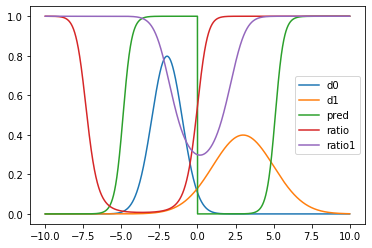

In [14]:
plt.plot(x_scale, d0_pdf*2, label='d0') # умножение на 2 для красоты графиков, на распределения не влияет
plt.plot(x_scale, d1_pdf*2, label='d1')
plt.plot(x_scale, dist.flatten(), label='pred')
plt.plot(x_scale, ratio, label='ratio')
plt.plot(x_scale, ratio1, label='ratio1')
plt.legend();

In [196]:
print([p.data[0] for p in layer.parameters()])

[tensor([1.4790, 0.3360]), tensor(-0.4146)]


In [197]:
torch.log(torch.sigmoid(torch.tensor(-100.)))

tensor(-inf)

In [198]:
F.logsigmoid(torch.tensor(-100.))

tensor(-100.)